In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Kannada-MNIST/sample_submission.csv
/kaggle/input/Kannada-MNIST/Dig-MNIST.csv
/kaggle/input/Kannada-MNIST/train.csv
/kaggle/input/Kannada-MNIST/test.csv


In [2]:
import torch
from torch import nn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_df = pd.read_csv("/kaggle/input/Kannada-MNIST/train.csv")
test_df = pd.read_csv("/kaggle/input/Kannada-MNIST/test.csv")
valid_df = pd.read_csv("/kaggle/input/Kannada-MNIST/Dig-MNIST.csv")

# Principal component Analysis

In [4]:
pca_train = PCA(n_components = 4,whiten=True)
pca_train.fit(train_df.drop('label',axis=1))

PCA(n_components=4, whiten=True)

In [5]:
transformed = pca_train.transform(train_df.drop('label',axis=1))
pd_transform = pd.DataFrame(transformed)
pd_transform

,0,1,2,3
0,1.369109,-0.722041,0.089563,-1.080314
1,0.677439,-0.264812,0.161016,-1.839477
2,-0.965913,1.754149,1.314659,-0.511088
3,-0.780289,0.273290,-1.261012,-0.028396
4,-0.217992,0.009664,-1.566405,0.420756
...,...,...,...,...
59995,-0.478651,1.043592,2.247565,0.485664
59996,-0.934635,0.123978,0.385477,-0.689512
59997,-1.290992,0.016141,1.426926,-1.177529
59998,1.751402,-0.287171,0.898958,1.544078


In [6]:
original_transform = pca_train.inverse_transform(transformed)
pd_original = pd.DataFrame(original_transform)
pd_original

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-8.197653e-15,-1.207291e-14,-4.224400e-14,8.934425e-16,5.235296e-15,0.003761,0.013380,-0.002044,0.002162,0.027867,...,0.030030,0.027097,0.018093,0.033973,0.026794,0.001122,0.007822,0.0,-0.000361,0.0
1,-4.172203e-16,-2.005484e-14,-7.159724e-14,1.519205e-15,8.942928e-15,0.016203,0.053119,0.029266,0.081618,0.149993,...,0.032634,0.019588,0.008047,0.018936,0.025391,-0.000100,0.008839,0.0,0.002522,0.0
2,1.490478e-13,-1.080874e-14,-2.078773e-14,4.295399e-16,3.763207e-15,0.037665,0.126656,0.157051,0.338803,0.513572,...,0.016093,0.023862,0.019499,0.033263,0.019737,0.001766,0.001730,0.0,0.005290,0.0
3,-1.182241e-13,6.073584e-15,5.446000e-16,1.246726e-17,-1.082742e-15,0.007837,0.014663,0.009462,0.030031,0.023622,...,0.011903,-0.005064,-0.006538,-0.011704,-0.003247,-0.000320,0.003778,0.0,0.007349,0.0
4,-1.477615e-13,1.209539e-14,1.823863e-14,-3.597827e-16,-3.530676e-15,-0.001858,-0.019618,-0.022941,-0.043184,-0.093185,...,0.011089,-0.001846,-0.001681,-0.004645,-0.003163,0.000301,0.003314,0.0,0.005820,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.350813e-13,-5.446201e-15,1.644490e-14,-3.839613e-16,-1.139138e-16,0.028874,0.111393,0.164298,0.324030,0.508964,...,0.010658,0.040165,0.038430,0.062779,0.025780,0.003888,0.000023,0.0,0.000304,0.0
59996,3.278284e-14,-8.989045e-15,-2.716484e-14,5.710480e-16,3.668858e-15,0.021604,0.076721,0.078700,0.167266,0.268619,...,0.016259,0.009066,0.003402,0.007245,0.010305,0.000199,0.004916,0.0,0.005006,0.0
59997,1.272046e-13,-1.924825e-14,-4.740643e-14,9.818161e-16,7.006724e-15,0.032094,0.122727,0.127890,0.265623,0.442497,...,0.018239,0.015000,0.006519,0.014045,0.016980,0.000226,0.005762,0.0,0.004169,0.0
59998,9.521181e-14,1.144433e-14,5.865878e-14,-1.264837e-15,-6.508663e-15,-0.007680,-0.018269,0.025417,0.020340,0.035253,...,0.012639,0.048614,0.050202,0.080381,0.027199,0.005304,0.000446,0.0,-0.005089,0.0


## Visualizing PCA

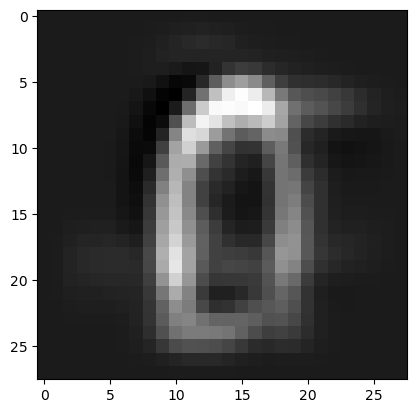

In [7]:
plt.imshow(pd_original[1:2].to_numpy().reshape(28,28),cmap="gray")

## Original Image

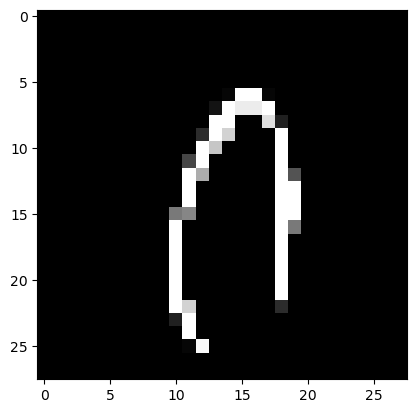

In [8]:
plt.imshow(train_df.drop('label',axis=1)[1:2].to_numpy().reshape(28,28),cmap="gray")

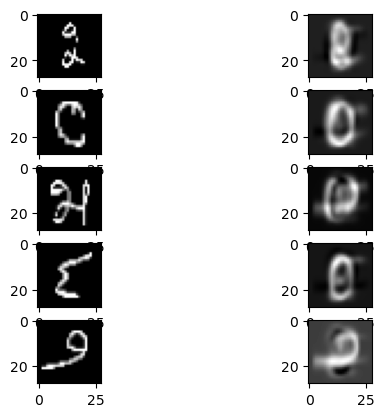

In [9]:
import random

n = 5
fig, ax = plt.subplots(n,2)
for i in range(n):
    x = random.randint(0, 783)
    ax[i, 0].imshow(train_df.drop('label',axis=1)[x : x+1].to_numpy().reshape(28, 28), cmap= 'gray')
    ax[i, 1].imshow(pd_original[x : x+1].to_numpy().reshape(28, 28), cmap= 'gray')
plt.show()

# Autoencoder

In [10]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
import torch.optim as optim
from tqdm import tqdm

In [11]:
class KanadaMnist(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)
        self.pixels = self.data.iloc[:, 1:].values.astype(float)/255.0

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        pixels = self.pixels[idx]
        return torch.tensor(pixels, dtype=torch.float32)

In [12]:
train_data = KanadaMnist("/kaggle/input/Kannada-MNIST/train.csv")
valid_data = KanadaMnist("/kaggle/input/Kannada-MNIST/Dig-MNIST.csv")

In [13]:
class Autoencoder(nn.Module):
    def __init__(self, k):
        super(Autoencoder, self).__init__()
        self.encoder_layer1 = nn.Linear(784, 512)
        self.sigmoid = nn.Sigmoid()
        self.encoder_layer2 = nn.Linear(512, 256)
        self.encoder_layer3 = nn.Linear(256, k)

        self.decoder_layer1 = nn.Linear(k, 256)
        self.decoder_layer2 = nn.Linear(256, 512)
        self.decoder_layer3 = nn.Linear(512, 784)

    def forward(self, x):
        # Encoding
        encoded = self.encoder_layer1(x)
        encoded = self.sigmoid(encoded)
        encoded = self.encoder_layer2(encoded)
        encoded = self.sigmoid(encoded)
        encoded = self.encoder_layer3(encoded)
        encoded = self.sigmoid(encoded)
        
        #Decoding
        decoded = self.decoder_layer1(encoded)
        decoded = self.sigmoid(decoded)
        decoded = self.decoder_layer2(decoded)
        decoded = self.sigmoid(decoded)
        decoded = self.decoder_layer3(decoded)
        decoded = self.sigmoid(decoded)

        return decoded

In [14]:
k=4
autoencoderModel=Autoencoder(k)
autoencoderModel

Autoencoder(
  (encoder_layer1): Linear(in_features=784, out_features=512, bias=True)
  (sigmoid): Sigmoid()
  (encoder_layer2): Linear(in_features=512, out_features=256, bias=True)
  (encoder_layer3): Linear(in_features=256, out_features=4, bias=True)
  (decoder_layer1): Linear(in_features=4, out_features=256, bias=True)
  (decoder_layer2): Linear(in_features=256, out_features=512, bias=True)
  (decoder_layer3): Linear(in_features=512, out_features=784, bias=True)
)

In [15]:
batch_size=64
train = DataLoader(train_data,batch_size=batch_size,shuffle=True)
valid = DataLoader(valid_data,batch_size=batch_size,shuffle=True)

In [16]:
learning_rate=0.001
num_epochs=20

loss_fn=nn.MSELoss()
optimizer=optim.AdamW(autoencoderModel.parameters(),lr=learning_rate)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
autoencoderModel.to(device)

Autoencoder(
  (encoder_layer1): Linear(in_features=784, out_features=512, bias=True)
  (sigmoid): Sigmoid()
  (encoder_layer2): Linear(in_features=512, out_features=256, bias=True)
  (encoder_layer3): Linear(in_features=256, out_features=4, bias=True)
  (decoder_layer1): Linear(in_features=4, out_features=256, bias=True)
  (decoder_layer2): Linear(in_features=256, out_features=512, bias=True)
  (decoder_layer3): Linear(in_features=512, out_features=784, bias=True)
)

In [17]:
num_batches = len(train_df) // batch_size

for epoch in range(num_epochs):
    total_loss = 0.0
    progress_bar = tqdm(range(num_batches), desc=f"Epoch [{epoch+1}/{num_epochs}]")

    autoencoderModel.train()
    for batch_idx in progress_bar:
        batch_start = batch_idx * batch_size
        batch_end = (batch_idx + 1) * batch_size

        batch_inputs = train_data[batch_start:batch_end].to(device)
        optimizer.zero_grad()

        batch_outputs = autoencoderModel(batch_inputs)
        reconstruction_loss = loss_fn(batch_outputs, batch_inputs)
        reconstruction_loss.backward()
        optimizer.step()

        total_loss += reconstruction_loss.item() * batch_inputs.size(0)
        average_loss = total_loss / (batch_idx + 1) * batch_size

        progress_bar.set_postfix({"Train Loss": f"{average_loss:.4f}"})

    progress_bar.close()
    autoencoderModel.eval()
    valid_loss = 0.0
    with torch.no_grad():
        for valid_batch in valid_data:
            valid_inputs = valid_batch.to(device)
            valid_outputs = autoencoderModel(valid_inputs)
            valid_loss += loss_fn(valid_outputs, valid_inputs).item() * valid_inputs.size(0)

    average_valid_loss = valid_loss / len(valid_df)
    print(f"Epoch [{epoch+1}/{num_epochs}], Valid Loss: {average_valid_loss:.4f}")

Epoch [1/20]: 100%|██████████| 937/937 [00:05<00:00, 164.57it/s, Train Loss=198.5932]


Epoch [1/20], Valid Loss: 56.3770


Epoch [2/20]: 100%|██████████| 937/937 [00:03<00:00, 243.85it/s, Train Loss=175.8661]


Epoch [2/20], Valid Loss: 52.7223


Epoch [3/20]: 100%|██████████| 937/937 [00:04<00:00, 220.69it/s, Train Loss=156.0405]


Epoch [3/20], Valid Loss: 51.7016


Epoch [4/20]: 100%|██████████| 937/937 [00:03<00:00, 244.56it/s, Train Loss=144.7004]


Epoch [4/20], Valid Loss: 50.8101


Epoch [5/20]: 100%|██████████| 937/937 [00:03<00:00, 246.35it/s, Train Loss=138.2156]


Epoch [5/20], Valid Loss: 49.6887


Epoch [6/20]: 100%|██████████| 937/937 [00:03<00:00, 239.23it/s, Train Loss=132.3834]


Epoch [6/20], Valid Loss: 48.9092


Epoch [7/20]: 100%|██████████| 937/937 [00:03<00:00, 240.82it/s, Train Loss=127.6235]


Epoch [7/20], Valid Loss: 48.2157


Epoch [8/20]: 100%|██████████| 937/937 [00:03<00:00, 240.93it/s, Train Loss=123.8669]


Epoch [8/20], Valid Loss: 47.7630


Epoch [9/20]: 100%|██████████| 937/937 [00:03<00:00, 248.22it/s, Train Loss=121.1382]


Epoch [9/20], Valid Loss: 47.4410


Epoch [10/20]: 100%|██████████| 937/937 [00:04<00:00, 216.28it/s, Train Loss=118.8950]


Epoch [10/20], Valid Loss: 47.2785


Epoch [11/20]: 100%|██████████| 937/937 [00:03<00:00, 241.70it/s, Train Loss=117.0594]


Epoch [11/20], Valid Loss: 47.1335


Epoch [12/20]: 100%|██████████| 937/937 [00:03<00:00, 246.16it/s, Train Loss=115.3900]


Epoch [12/20], Valid Loss: 46.9703


Epoch [13/20]: 100%|██████████| 937/937 [00:03<00:00, 247.28it/s, Train Loss=113.8799]


Epoch [13/20], Valid Loss: 46.8513


Epoch [14/20]: 100%|██████████| 937/937 [00:03<00:00, 236.77it/s, Train Loss=112.4886]


Epoch [14/20], Valid Loss: 46.6976


Epoch [15/20]: 100%|██████████| 937/937 [00:03<00:00, 241.54it/s, Train Loss=111.3145]


Epoch [15/20], Valid Loss: 46.5288


Epoch [16/20]: 100%|██████████| 937/937 [00:03<00:00, 239.69it/s, Train Loss=110.2206]


Epoch [16/20], Valid Loss: 46.3913


Epoch [17/20]: 100%|██████████| 937/937 [00:03<00:00, 246.22it/s, Train Loss=109.2452]


Epoch [17/20], Valid Loss: 46.2713


Epoch [18/20]: 100%|██████████| 937/937 [00:03<00:00, 245.89it/s, Train Loss=108.4117]


Epoch [18/20], Valid Loss: 46.0972


Epoch [19/20]: 100%|██████████| 937/937 [00:03<00:00, 246.21it/s, Train Loss=107.5510]


Epoch [19/20], Valid Loss: 45.9091


Epoch [20/20]: 100%|██████████| 937/937 [00:03<00:00, 245.14it/s, Train Loss=106.8062]


Epoch [20/20], Valid Loss: 45.8370


# Visualizing it Now

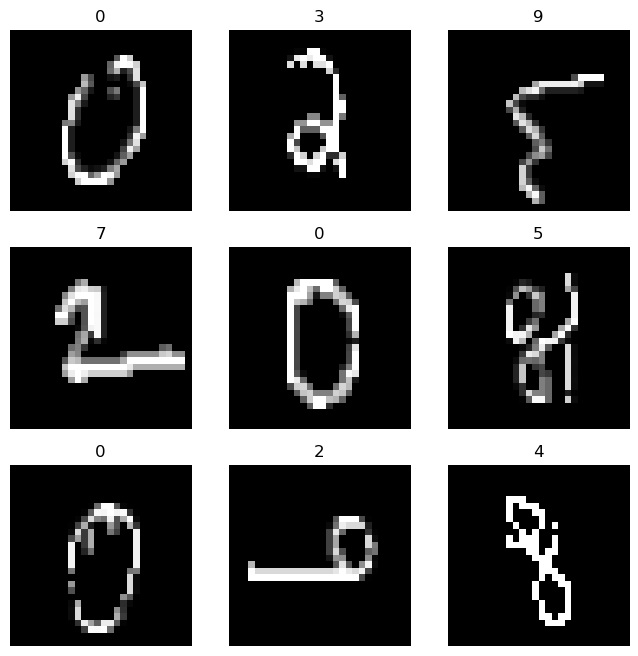

In [18]:
import matplotlib.pyplot as plt
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize = (8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):

    # taking a random index in the range 0 to length of training_data
    sample_idx = torch.randint(len(train_df), size = (1,)).item()

    # training_data[i] returns image and the label of the image.
    labels = train_df.iloc[sample_idx,0]
    img = np.array(train_df.drop("label", axis = 1).iloc[sample_idx].values).reshape((28,28))

    # Visualizing the images
    figure.add_subplot(rows, cols, i)
    plt.title(labels)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap = "gray")
plt.show()

In [19]:
autoencoderModel.eval()

pred_df = pd.DataFrame()

with torch.no_grad():
    for pred_batch in valid_data:
        pred_inputs = pred_batch.to(device)
        pred_outputs = autoencoderModel(pred_inputs)
        pred_outputs = pred_outputs.cpu().numpy().reshape(-1, 784)  # Reshape to have 784 columns
        pred_df = pred_df.append(pd.DataFrame(pred_outputs), ignore_index=True)

/tmp/ipykernel_28/43958922.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df = pred_df.append(pd.DataFrame(pred_outputs), ignore_index=True)


In [20]:
pred_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.000149,0.000131,0.000143,0.000151,0.000150,0.000134,0.000167,0.000248,0.000287,0.000168,...,0.000167,0.000298,0.000208,0.000265,0.000172,0.000163,0.000159,0.000150,0.000142,0.000135
1,0.000079,0.000070,0.000082,0.000077,0.000085,0.000073,0.000103,0.000217,0.000584,0.000269,...,0.000097,0.000183,0.000132,0.000157,0.000107,0.000088,0.000083,0.000079,0.000076,0.000076
2,0.000203,0.000199,0.000205,0.000199,0.000213,0.000206,0.000351,0.000597,0.001890,0.001091,...,0.000211,0.000273,0.000228,0.000255,0.000222,0.000202,0.000196,0.000204,0.000211,0.000201
3,0.000096,0.000082,0.000096,0.000082,0.000089,0.000101,0.000105,0.000119,0.000026,0.000008,...,0.000087,0.000103,0.000094,0.000089,0.000097,0.000084,0.000092,0.000093,0.000094,0.000091
4,0.000102,0.000097,0.000104,0.000096,0.000102,0.000094,0.000112,0.000124,0.000045,0.000017,...,0.000105,0.000099,0.000099,0.000102,0.000110,0.000099,0.000102,0.000103,0.000109,0.000086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,0.000297,0.000294,0.000310,0.000279,0.000306,0.000295,0.000333,0.000386,0.000484,0.000249,...,0.000319,0.000368,0.000349,0.000356,0.000319,0.000295,0.000292,0.000308,0.000306,0.000282
10236,0.000074,0.000082,0.000089,0.000091,0.000097,0.000105,0.000461,0.002273,0.047960,0.047984,...,0.000103,0.000132,0.000111,0.000132,0.000100,0.000094,0.000080,0.000095,0.000084,0.000093
10237,0.000103,0.000094,0.000092,0.000084,0.000094,0.000100,0.000193,0.000272,0.000060,0.000015,...,0.000094,0.000090,0.000089,0.000098,0.000100,0.000091,0.000101,0.000097,0.000087,0.000104
10238,0.000073,0.000076,0.000075,0.000068,0.000077,0.000076,0.000102,0.000155,0.000227,0.000053,...,0.000087,0.000107,0.000089,0.000093,0.000094,0.000073,0.000075,0.000075,0.000079,0.000074


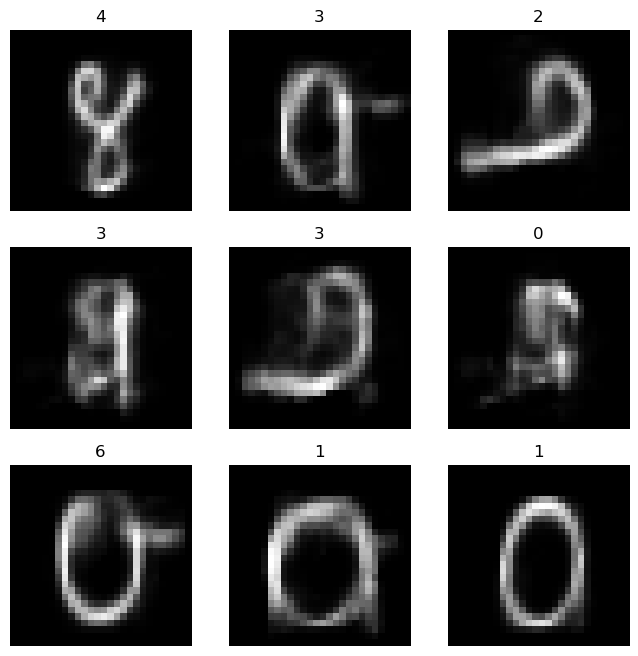

In [21]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    # Ensure the sample_idx is within the bounds of pred_df length
    sample_idx = np.random.randint(len(pred_df))
    
    # pred_df[i] returns image and the label of the image.
    labels = valid_df.iloc[sample_idx, 0]
    img = np.array(pred_df.iloc[sample_idx].values).reshape((28, 28))

    # Visualizing the images
    figure.add_subplot(rows, cols, i)
    plt.title(labels)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()